In [ ]:
# Install libraries if not already installed
!pip install tensorflow matplotlib numpy

In [16]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [18]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [57]:
# Class names for the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [59]:
train_images.shape

(60000, 28, 28)

In [61]:
len(train_labels)


60000

In [63]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [65]:
test_images.shape


(10000, 28, 28)

In [67]:
len(test_labels)


10000

# preprocess data

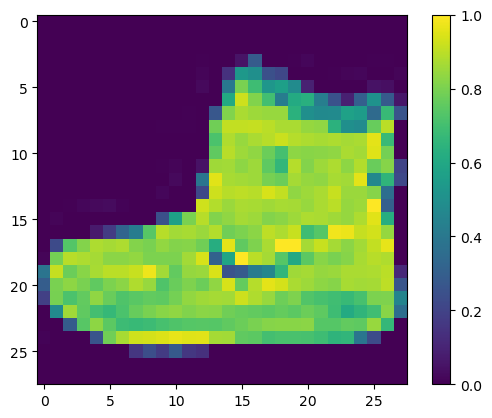

In [70]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
# Normalize the images to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

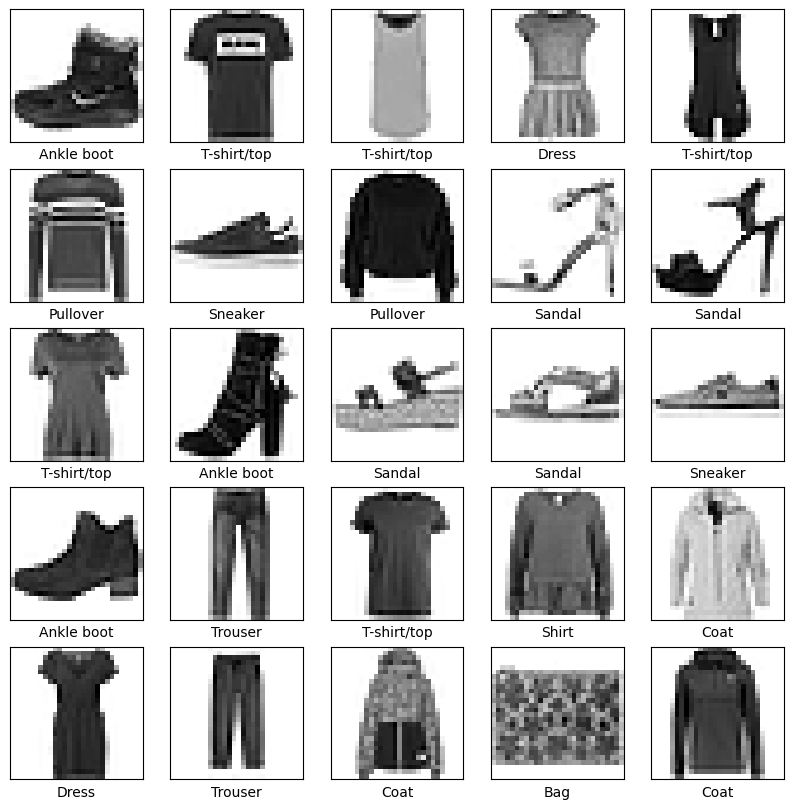

In [94]:
# Display the first 25 images from the training dataset along with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [96]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the image (28x28 to 784)
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    tf.keras.layers.Dense(10)  # Output layer with 10 neurons (one for each class)
])

In [98]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [100]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5741 - loss: 1.4825
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7667 - loss: 0.6599
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7956 - loss: 0.5676
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8153 - loss: 0.5231
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8245 - loss: 0.4986
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8315 - loss: 0.4770
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8403 - loss: 0.4566
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8454 - loss: 0.4444
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8503 - loss: 0.4291
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8500 - loss: 0.4263
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8531 - loss: 0.4220
Epoch 12/30
1875/1875 ━━━━━━━━

In [102]:
# Evaluate the model's performance on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - 2ms/step - accuracy: 0.8579 - loss: 0.3939

Test accuracy: 0.8579000234603882


In [104]:
# Make predictions on the test data
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


In [106]:
# Function to plot the image and its prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

In [108]:
# Function to plot the prediction values
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

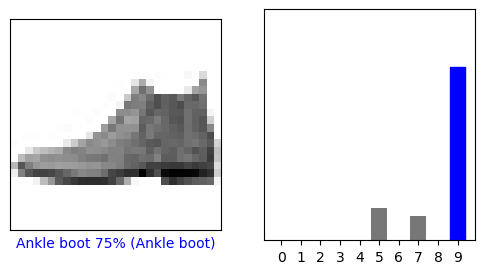

In [110]:
# Visualize the predictions on the test data
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

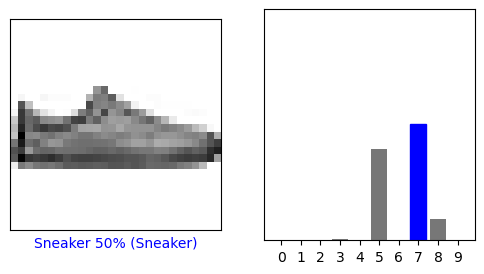

In [112]:
# Let's look at more images and their predictions
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


In [114]:
# Using the trained model to make predictions on a single image
img = test_images[1]
print(f"Image shape: {img.shape}")

Image shape: (28, 28)


In [116]:
# Expand dimensions to match the model's input shape (batch of 1)
img = np.expand_dims(img, 0)
predictions_single = probability_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


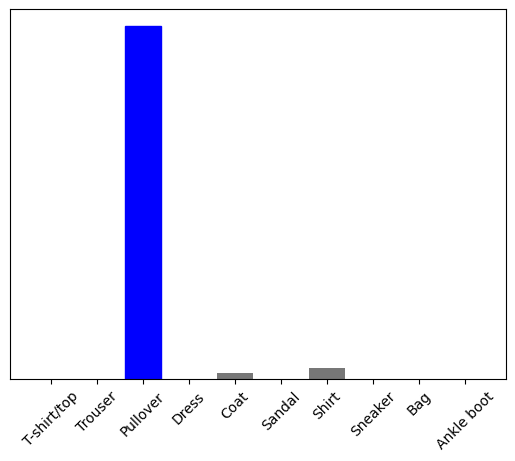

In [118]:
# Plot the prediction and its confidence values
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [120]:
# Output the predicted label
print(f"Predicted label: {np.argmax(predictions_single[0])}")

Predicted label: 2


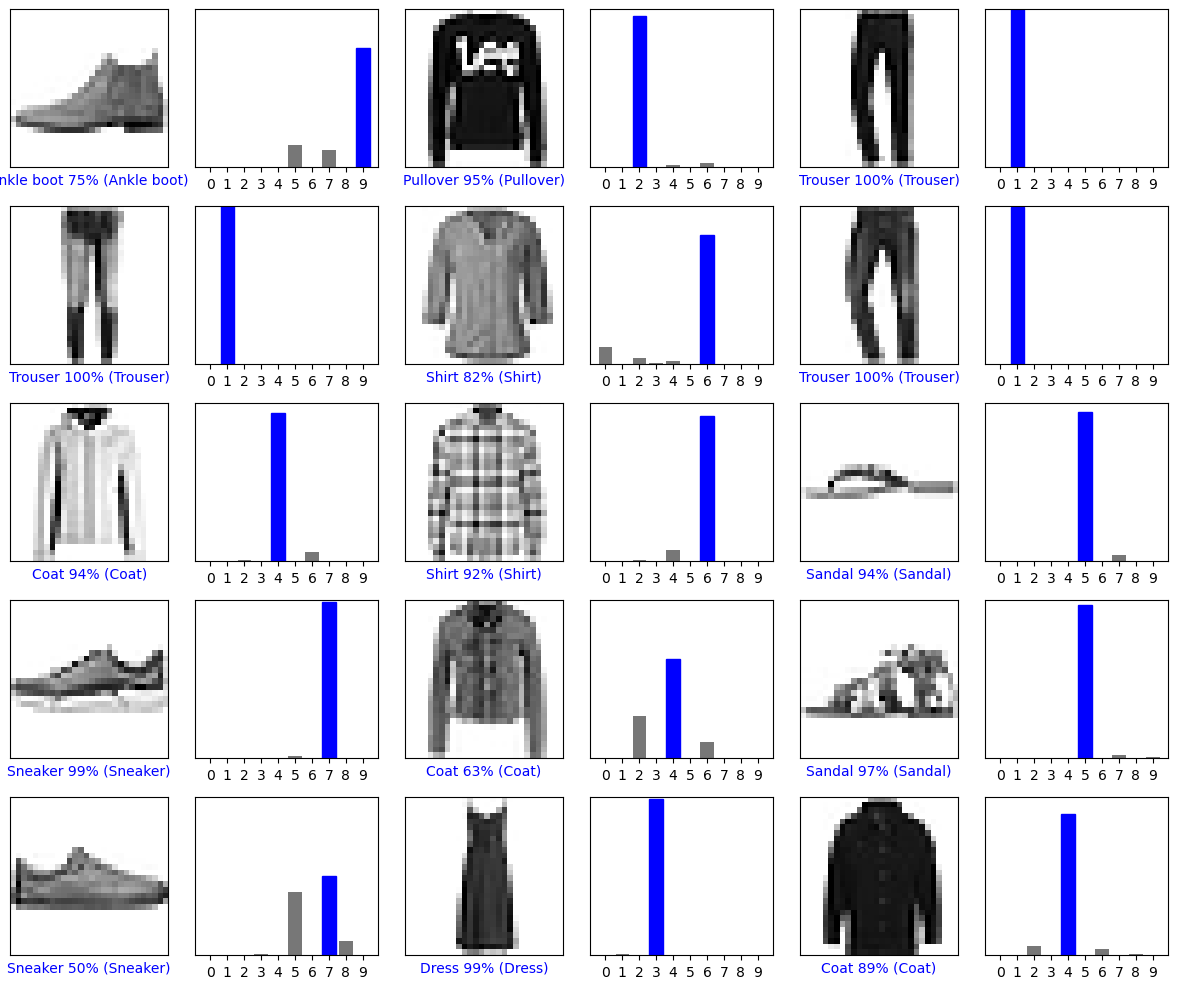

In [122]:
# Plot a grid of the first X test images with their predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()